# A RenderMan Example

Here is how you can use the RenderMan library to get data from synths. I'll be using [Dexed](https://asb2m10.github.io/dexed/) as the plugin, which is a close model of the Yamaha DX7. 

![](https://i.ytimg.com/vi/bdd_yOCmRUw/hqdefault.jpg)

First, we set up the two objects which render and create synth parameters respectively from the classes 'RenderEngine' and 'PatchGenerator'. I am working on Linux and therefore VSTs are shared objects - .so files. At the end I print out the plugins parameters so it is easy to see which parameter does what at which index.

In [1]:
import librenderman as rm

# Important settings. These are good general ones.
sampleRate = 44100
bufferSize = 512
fftSize = 512

# This will host a VST. It will render the features and audio we need.
engine = rm.RenderEngine(sampleRate, bufferSize, fftSize)

# Load the VST into the RenderEngine.
# Warning: lastest working Dexed version: 0.9.3 (0.9.4 and later: segfault)
path = "/home/gwendal/Jupyter/AudioPlugins/Dexed.so"
engine.load_plugin(path)

# Create a patch generator. We can initialise it to generate the correct
# patches for a given synth by passing it a RenderEngine which has
# loaded a instance of the synthesiser. 
generator = rm.PatchGenerator(engine)

# We can also get a string of information about the
# available parameters.
print(engine.get_plugin_parameters_description())

  0: Cutoff
  1: Resonance
  2: Output
  3: MASTER TUNE ADJ
  4: ALGORITHM
  5: FEEDBACK
  6: OSC KEY SYNC
  7: LFO SPEED
  8: LFO DELAY
  9: LFO PM DEPTH
 10: LFO AM DEPTH
 11: LFO KEY SYNC
 12: LFO WAVE
 13: MIDDLE C
 14: P MODE SENS.
 15: PITCH EG RATE 1
 16: PITCH EG RATE 2
 17: PITCH EG RATE 3
 18: PITCH EG RATE 4
 19: PITCH EG LEVEL
 20: PITCH EG LEVEL
 21: PITCH EG LEVEL
 22: PITCH EG LEVEL
 23: OP1 EG RATE 1
 24: OP1 EG RATE 2
 25: OP1 EG RATE 3
 26: OP1 EG RATE 4
 27: OP1 EG LEVEL 1
 28: OP1 EG LEVEL 2
 29: OP1 EG LEVEL 3
 30: OP1 EG LEVEL 4
 31: OP1 OUTPUT LEVE
 32: OP1 MODE
 33: OP1 F COARSE
 34: OP1 F FINE
 35: OP1 OSC DETUNE
 36: OP1 BREAK POINT
 37: OP1 L SCALE DEP
 38: OP1 R SCALE DEP
 39: OP1 L KEY SCALE
 40: OP1 R KEY SCALE
 41: OP1 RATE SCALIN
 42: OP1 A MOD SENS.
 43: OP1 KEY VELOCIT
 44: OP1 SWITCH
 45: OP2 EG RATE 1
 46: OP2 EG RATE 2
 47: OP2 EG RATE 3
 48: OP2 EG RATE 4
 49: OP2 EG LEVEL 1
 50: OP2 EG LEVEL 2
 51: OP2 EG LEVEL 3
 52: OP2 EG LEVEL 4
 53: OP2 OUTPU

## Rendering Patches

We can render a patch by getting one from the generator, and rendering it with the engine. The archetecture of the DX7 and therefore Dexed too, needs to have any carrier operator's parameter 'EG LEVEL 4' set to 0.0 and 'EG RATE 4' to 1.0 to prevent hanging notes, its intentional - not a bug! Because we are just making random presets, I have overriden all of them because it would be too verbose in this tutorial to write logic to only set the carriers used in the set algorithm (parameter 4 - see the above output!)

Overriding all the operator's level and rate parameters however completely kills the envelope - you'll probably want to experiment with all of this (or try removing the overriden parameters) if you end up trying Dexed too :)

In [2]:
# Get a random patch and set it.
new_patch = generator.get_random_patch()
engine.set_patch(new_patch)

# We need to override some parameters to prevent hanging notes in
# Dexed. 
overriden_parameters = [(26, 1.),  (30, 0.),  (48, 1.),  (52, 0.), 
                        (70, 1.),  (74, 0.),  (92, 1.),  (96, 0.), 
                        (114, 1.), (118, 0.), (136, 1.), (140, 0.)]

# Loop through each tuple, unpack it and override the correct
# parameter with the correct value to prevent hanging notes.
for parameter in overriden_parameters:
    index, value = parameter
    engine.override_plugin_parameter(index, value)


# Settings to play a note and extract data from the synth.
midiNote = 40
midiVelocity = 127
noteLength = 4.0
renderLength = 5.0

# Render the data. 
engine.render_patch(midiNote, midiVelocity, noteLength, renderLength)

# Get the data. Note the audio is automattically made mono, no
# matter what channel size for ease of use.
audio = engine.get_audio_frames()
#mfccs = engine.get_mfcc_features()  # TODO remettre ???

# Get the patch and display it!
patch = engine.get_patch()

# The patch is just a list of tuples, one int for index
# and one float for the value. I've printed out the patch,
# note the overriden parameters are the correct ones!
for parameter in patch:
    
    # Unpack and print the parameter tuple.
    index, value = parameter
    print("Index: " + '{:3d}'.format(index) + " --- Value: " + str(value))

Index:   0 --- Value: 0.20720615983009338
Index:   1 --- Value: 0.6915453672409058
Index:   2 --- Value: 0.9470048546791077
Index:   3 --- Value: 0.983087420463562
Index:   4 --- Value: 0.0013568925205618143
Index:   5 --- Value: 0.6974703669548035
Index:   6 --- Value: 0.07037406414747238
Index:   7 --- Value: 0.5354169011116028
Index:   8 --- Value: 0.4374684989452362
Index:   9 --- Value: 0.27043983340263367
Index:  10 --- Value: 0.35703378915786743
Index:  11 --- Value: 0.09765153378248215
Index:  12 --- Value: 0.20712190866470337
Index:  13 --- Value: 0.1940644383430481
Index:  14 --- Value: 0.6579684615135193
Index:  15 --- Value: 0.2928488850593567
Index:  16 --- Value: 0.09549210220575333
Index:  17 --- Value: 0.12510047852993011
Index:  18 --- Value: 0.7984612584114075
Index:  19 --- Value: 0.32370904088020325
Index:  20 --- Value: 0.6013094782829285
Index:  21 --- Value: 0.5656446218490601
Index:  22 --- Value: 0.41362109780311584
Index:  23 --- Value: 0.9996947646141052
Inde

## Visualising Audio
We are not just limited to listening to audio, we can look at it too visually. We plot the amplitude over time by simply using matplotlib's plot function.

Text(0.5, 0, 'Time (frame count)')

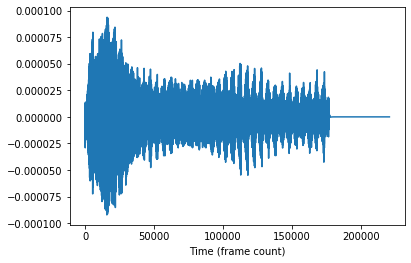

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(audio)
plt.xlabel('Time (frame count)')

## Spectrograms
We can look at frequency over time by using specgram. The y-axis is the frequency, pass the samplerate as the 'Fs' argument to set the range correctly - remember the Nyquist frequency is half the sample rate! The X-axis is time. 

Text(0, 0.5, 'Frequency')

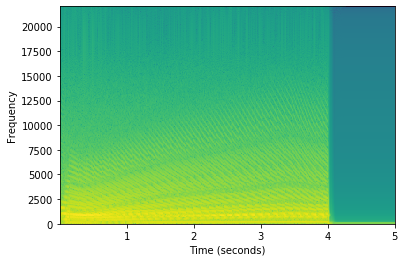

In [4]:
plt.specgram(audio, NFFT=512, Fs=sampleRate, noverlap=256)

# Plot a spectrogram
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

## Playing The Rendered Audio

If working in a notebook, IPython supplies a easy way to load a mono list of samples into a HTML audio tag. If you aren't using IPython then you can use RenderMan to write to a wav, or use a python library like librosa to write to a wav. 

In [5]:
from IPython.display import Audio

Audio(audio, rate=sampleRate)

##Usage in TensorFlow

TensorFlow creates graphs of operations that allows for efficient machine learning computation on either the CPU using Eigen or the GPU using CUDA and cuDNN. Whilst we can't just throw in python commands in to the TensorFlow graph, we can use RenderMan in machine learning as an op with the use of TensorFlow's [tf.py_func(func, inp, Tout)](https://www.tensorflow.org/versions/r0.9/api_docs/python/script_ops.html#py_func).

TBC!!!

In [6]:
# import tensorflow as tf

# mfcc_feature_rows = len(mfccs[0])
# mfcc_feature_cols = len(mfccs)

# number_plugin_parameters = engine.get_plugin_parameter_size()

# pretend_model_output = tf.placeholder("float", [None,
#                                                 number_plugin_parameters])

# def actual_output(parameters):
#     engine.

# tf.sqrt(tf.reduce_mean(tf.square(tf.sub(targets, pretend_model_output))))